In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [5]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
len(X_train)

60000

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

5
0
4
1
9


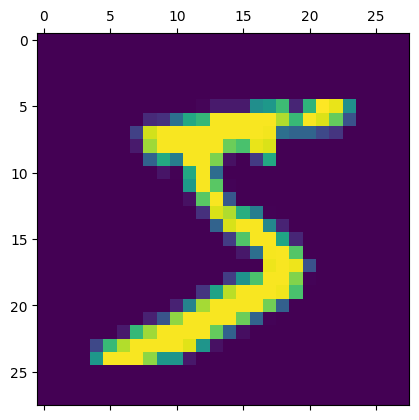

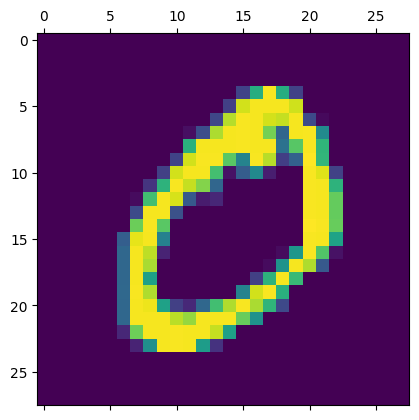

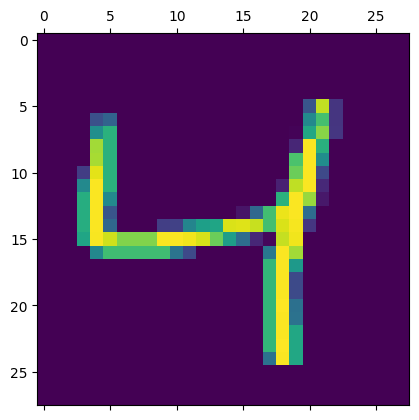

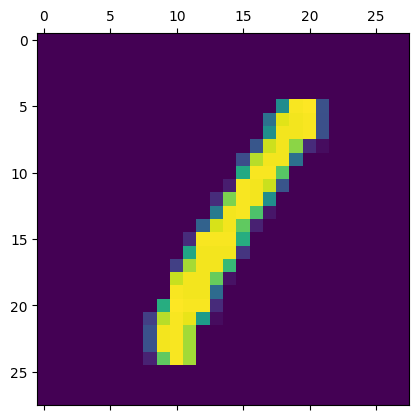

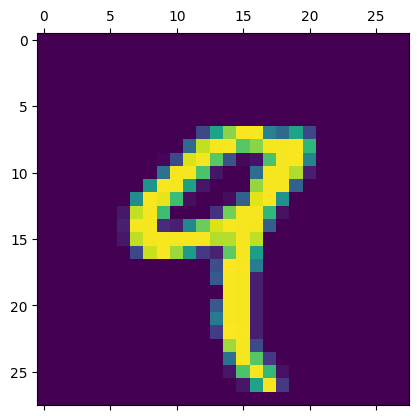

In [8]:
# LETS USE .MATSHOW FUNCTION FROM THE MATPLOTLIB LIBRARY TO PLOT THE DIGITS
for i in range(5):
  plt.matshow(X_train[i])
  print(Y_train[i])

In [9]:
# LETS CHECK THE SHAPE OF THE TRAINING AND TESTING DATASET
# SO WE CAN SEE THAT THERE 28 X 28 MATRIX WHERE THERE ARE 28 ROWS AND 28 COLUMNS AND THERE 6000 OF SUCH IMAGES
X_train.shape

(60000, 28, 28)

In [10]:
# SINCE THIS DATASET IS OF 2 DIMENTIONAL MATRICES LETS CONVERT IT TO 1 DIMENSIONAL MATRIX BY USING RESHAPE FUNCTION FROM PANDAS
X_train_flattened = X_train.reshape(len(X_train),28*28) # IT TAKES 2 ARGUMENTS AND 28*28=784 SO YOU CAN MENTION IT AS IT IS TOO
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
# IMPORTING MINMAX SCALER SINCE IT IS AN IMAGE PIXEL VALUES AND DOES NOT HAVE A GAUSSIAN DISTRIBUTION
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_flattened_scaled=scaler.fit_transform(X_train_flattened)
X_test_flattened_scaled=scaler.fit_transform(X_test_flattened)

In [12]:
X_train_flattened_scaled.shape

(60000, 784)

In [13]:
# NOW LETS BUILD THE MODEL

model=keras.Sequential([ # SINCE THIS THE MODEL IS LIKE A STACK IT IS BUILT IN SEQUENCE THUS SEQUENTIAL
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') # SINCE THIS IS A CATEGORICAL CLASSIFICATION WE ARE USING SIGMOID FUCTION AND SINCE EACH NEURON IS CONNECTED TO EVERY OTHER NEURON IN THE HIDDEN LAYER IT IS USING 'DENSE'
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['Accuracy'])
model.fit(X_train_flattened_scaled,Y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.8112 - loss: 0.7222
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9143 - loss: 0.3127
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9199 - loss: 0.2849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - Accuracy: 0.9231 - loss: 0.2733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9273 - loss: 0.2644


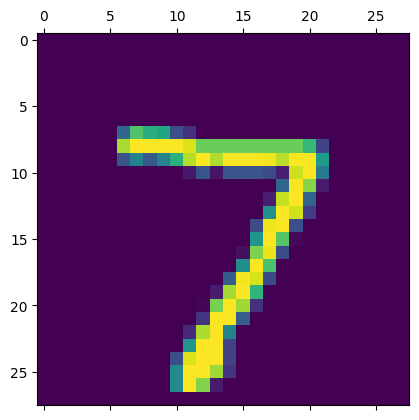

In [14]:
plt.matshow(X_test[0])

In [15]:
model.evaluate(X_test_flattened_scaled,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9176 - loss: 0.3011


[0.26692503690719604, 0.9283999800682068]

In [16]:
Y_predicted=model.predict(X_test_flattened_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
# SO HERE FOR EACH OUTPUT CLASS FROM 0-10 BASED ON THE PROBABILITY EACH OUTPUT CLASS IS GIVEN A SCORE IN ORDER SO FOR 0 THE SCORE 2.001695E-02
Y_predicted[0]

array([1.9183956e-02, 2.7344100e-07, 6.9129772e-02, 9.5112038e-01,
       4.3826094e-03, 1.3489605e-01, 3.1015563e-06, 9.9975234e-01,
       1.1890815e-01, 5.8709687e-01], dtype=float32)

In [18]:
# IN ORDER TO PREDICT WHICH OUTPUT CLASS THAT IS THE ANSWER BETWEEN 0-10 USING np.argmax() FUNCTION AS THIS READS THE ARRAY AND RETURNS THE INDEX OF THE VALUE WITH MAXIMUM VALUE
print(np.argmax(Y_predicted[0]))

7


In [19]:
# NOW TO CONVERT
Y_predicted_array=[]
for i in Y_predicted:
  Y_predicted_array.append(np.argmax(i))
Y_predicted_array

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [20]:
# LETS PLOT A CONFUSION MATRIX FOR THE MODEL'S PREDICTION IN TENSORFLOW CONFUSION_MATRIX FUNCTION IS IN MATH MODULE
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_array)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    0,    2,    0,    7,   12,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  927,   17,    8,    5,   13,    8,   38,    4],
       [   2,    0,   16,  924,    1,   24,    4,    9,   23,    7],
       [   1,    1,    2,    1,  921,    0,   13,    3,   10,   30],
       [   7,    2,    2,   25,   10,  789,   19,    3,   30,    5],
       [   7,    3,    5,    1,    7,    7,  925,    2,    1,    0],
       [   1,    5,   25,    7,   10,    1,    0,  931,    2,   46],
       [   6,    6,    6,   19,    9,   25,   11,    6,  879,    7],
       [  11,    6,    1,   10,   33,    8,    0,   10,    7,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

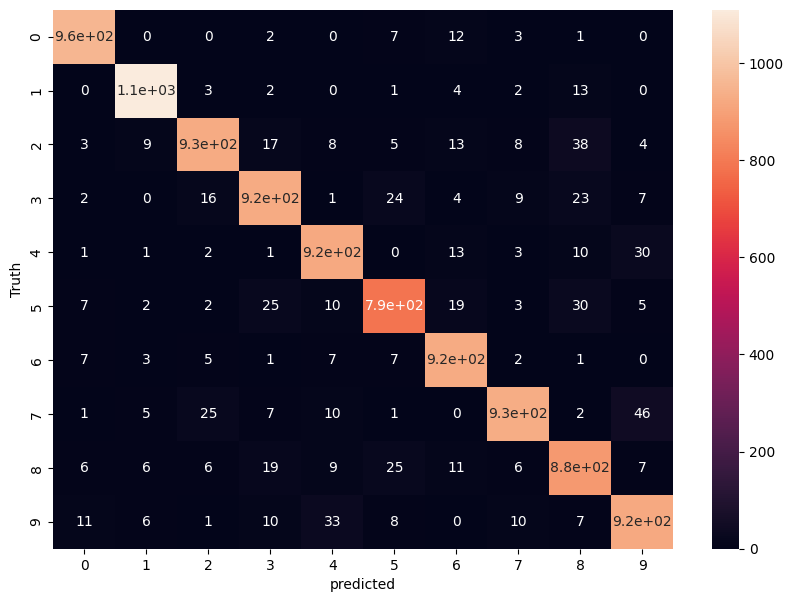

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [25]:
# LETS TRY TO ADD TO A HIDDEN AND FLATTEN LAYER
model=keras.Sequential([
    keras.layers.Dense(100 ,input_shape=(784,),activation='tanh'),#100 - REPRESENT NUMBER OF NEURONS IN HIDDEN LAYER
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened_scaled,Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8739 - loss: 0.4503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9546 - loss: 0.1554
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.1030
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9766 - loss: 0.0783
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0570


In [6]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
scaler=MinMaxScaler()
X_train_flattened_scaled=scaler.fit_transform(X_train_flattened)
X_test_flattened_scaled=scaler.fit_transform(X_test_flattened)
model=keras.Sequential([
 #   keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(28*28,),activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened_scaled,Y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8702 - loss: 0.4500
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9557 - loss: 0.1517
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9712 - loss: 0.1035
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9775 - loss: 0.0762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9841 - loss: 0.0566


In [8]:
model.evaluate(X_test_flattened_scaled,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9706 - loss: 0.0947


[0.08622979372739792, 0.973800003528595]